In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [2]:
crime = pd.read_csv('crimestat2.csv', error_bad_lines=False, engine="python")

C:\Users\Ryan\AppData\Local\Temp\ipykernel_9400\3422522221.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  crime = pd.read_csv('crimestat2.csv', error_bad_lines=False, engine="python")


In [3]:
crime

,INC_NUMBER,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100_BLOCK_ADDR,ZIP,PREMISE_TYPE
0,2.016E+14,11/1/2015 0:00,1/9/2016 0:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,2.016E+14,11/1/2015 0:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,2.015E+14,11/1/2015 0:00,11/1/2015 9:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,2.015E+14,11/1/2015 0:00,11/1/2015 5:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,2.015E+14,11/1/2015 0:00,11/1/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE
...,...,...,...,...,...,...,...
131672,2.017E+14,11/17/2017 4:15,11/17/2017 4:30,LARCENY-THEFT,16XX E INDIAN SCHOOL RD,85016.0,CONVENIENCE MARKET / STORE
131673,2.017E+14,11/17/2017 5:00,11/17/2017 9:50,MOTOR VEHICLE THEFT,43XX N 103RD AVE,85037.0,APARTMENT
131674,2.017E+14,11/17/2017 5:34,NaN,AGGRAVATED ASSAULT,8XX N 59TH AVE,85043.0,ABANDONED/CONDEMNED STRUCTURE
131675,2.017E+14,11/17/2017 5:50,11/17/2017 7:50,BURGLARY,51XX N 39TH DR,85019.0,SINGLE FAMILY HOUSE


In [4]:
###### Grouping crime by location ###### 

In [5]:
CrimeByLocation = pd.read_csv('crimestat2.csv', index_col='ZIP', error_bad_lines=False, engine="python")
CrimeByLocation.sort_index(inplace=True)
CrimeByLocation.head()

C:\Users\Ryan\AppData\Local\Temp\ipykernel_9400\1938793929.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  CrimeByLocation = pd.read_csv('crimestat2.csv', index_col='ZIP', error_bad_lines=False, engine="python")


,INC_NUMBER,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100_BLOCK_ADDR,PREMISE_TYPE
ZIP,,,,,,
85003.0,2.016E+14,5/7/2016 22:00,5/7/2016 22:15,AGGRAVATED ASSAULT,S 7TH AVE & W JEFFERSON ST,STREET / ROADWAY / ALLEY / SIDEWALK
85003.0,2.017E+14,8/20/2017 2:00,NaN,AGGRAVATED ASSAULT,3XX N CENTRAL AVE,LIGHT RAIL PLATFORM
85003.0,2.0168E+11,1/31/2016 16:20,NaN,LARCENY-THEFT,1XX W MCDOWELL RD,PARKING LOT
85003.0,2.017E+14,11/8/2017 18:27,11/8/2017 18:27,DRUG OFFENSE,1XX W YUMA ST,STREET / ROADWAY / ALLEY / SIDEWALK
85003.0,2.016E+14,6/28/2016 16:00,NaN,MOTOR VEHICLE THEFT,5XX W WILLETTA ST,SINGLE FAMILY HOUSE


In [6]:
print(CrimeByLocation)

         INC_NUMBER      OCCURRED_ON      OCCURRED_TO   UCR_CRIME_CATEGORY  \
ZIP                                                                          
85003.0   2.016E+14   5/7/2016 22:00   5/7/2016 22:15   AGGRAVATED ASSAULT   
85003.0   2.017E+14   8/20/2017 2:00              NaN   AGGRAVATED ASSAULT   
85003.0  2.0168E+11  1/31/2016 16:20              NaN        LARCENY-THEFT   
85003.0   2.017E+14  11/8/2017 18:27  11/8/2017 18:27         DRUG OFFENSE   
85003.0   2.016E+14  6/28/2016 16:00              NaN  MOTOR VEHICLE THEFT   
...             ...              ...              ...                  ...   
85396.0   2.017E+14   8/23/2017 0:00              NaN        LARCENY-THEFT   
85396.0   2.017E+14  8/10/2017 17:00  8/11/2017 15:00  MOTOR VEHICLE THEFT   
NaN       2.017E+14   11/4/2016 0:00   6/25/2017 0:00                 RAPE   
NaN       2.017E+14   2/4/2017 10:00   2/4/2017 10:14        LARCENY-THEFT   
NaN       2.017E+14  2/18/2017 12:00  2/27/2017 15:23        LAR

In [7]:
###### Where a crime is most common ###### For LARCENY-THEFT

In [8]:
Theft = crime[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT')]

In [9]:
TheftFrequency = Theft.ZIP

In [10]:
TheftFrequency

2         85014.0
5         85017.0
6         85085.0
8         85014.0
10        85027.0
           ...   
131663    85033.0
131664    85007.0
131668    85027.0
131669    85254.0
131672    85016.0
Name: ZIP, Length: 66216, dtype: float64

In [11]:
TheftFrequency.value_counts()

85015.0    3636
85008.0    3196
85051.0    2598
85041.0    2548
85032.0    2533
           ... 
85382.0       1
85266.0       1
85202.0       1
85268.0       1
85233.0       1
Name: ZIP, Length: 77, dtype: int64

In [12]:
###### Fastest growing / shrinking crime rates ###### For LARCENY-THEFT versus BURGLURY 

In [13]:
crime['OCCURRED_ON'] = pd.to_datetime(crime['OCCURRED_ON'], format='%m/%d/%Y %H:%M')

In [14]:
jan = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') & (crime.OCCURRED_ON >= '01/01/2017 0:00') & (crime.OCCURRED_ON < '02/01/2017 0:00')].value_counts()
febu = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '02/01/2017 0:00') & (crime.OCCURRED_ON < '03/01/2017 0:00')].value_counts()
mar = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '03/01/2017 0:00') & (crime.OCCURRED_ON < '04/01/2017 0:00')].value_counts()
apr = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '04/01/2017 0:00') & (crime.OCCURRED_ON < '05/01/2017 0:00')].value_counts()
may = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '05/01/2017 0:00') & (crime.OCCURRED_ON < '06/01/2017 0:00')].value_counts()
jun = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '06/01/2017 0:00') & (crime.OCCURRED_ON < '07/01/2017 0:00')].value_counts()
jul = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '07/01/2017 0:00') & (crime.OCCURRED_ON < '08/01/2017 0:00')].value_counts()
aug = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '08/01/2017 0:00') & (crime.OCCURRED_ON < '09/01/2017 0:00')].value_counts()
sep = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '09/01/2017 0:00') & (crime.OCCURRED_ON < '10/01/2017 0:00')].value_counts()
octo = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '10/01/2017 0:00') & (crime.OCCURRED_ON < '11/01/2017 0:00')].value_counts()
nov = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '11/01/2017 0:00') & (crime.OCCURRED_ON < '12/01/2017 0:00')].value_counts()
dec = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '12/01/2017 0:00') & (crime.OCCURRED_ON < '01/01/2018 0:00')].value_counts()

In [20]:
janB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='BURGLARY') & (crime.OCCURRED_ON >= '01/01/2017 0:00') & (crime.OCCURRED_ON < '02/01/2017 0:00')].value_counts()
febuB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='BURGLARY') &(crime.OCCURRED_ON >= '02/01/2017 0:00') & (crime.OCCURRED_ON < '03/01/2017 0:00')].value_counts()
marB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='BURGLARY') &(crime.OCCURRED_ON >= '03/01/2017 0:00') & (crime.OCCURRED_ON < '04/01/2017 0:00')].value_counts()
aprB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='BURGLARY') &(crime.OCCURRED_ON >= '04/01/2017 0:00') & (crime.OCCURRED_ON < '05/01/2017 0:00')].value_counts()
mayB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='BURGLARY') &(crime.OCCURRED_ON >= '05/01/2017 0:00') & (crime.OCCURRED_ON < '06/01/2017 0:00')].value_counts()
junB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='BURGLARY') &(crime.OCCURRED_ON >= '06/01/2017 0:00') & (crime.OCCURRED_ON < '07/01/2017 0:00')].value_counts()
julB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='BURGLARY') &(crime.OCCURRED_ON >= '07/01/2017 0:00') & (crime.OCCURRED_ON < '08/01/2017 0:00')].value_counts()
augB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='BURGLARY') &(crime.OCCURRED_ON >= '08/01/2017 0:00') & (crime.OCCURRED_ON < '09/01/2017 0:00')].value_counts()
sepB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='BURGLARY') &(crime.OCCURRED_ON >= '09/01/2017 0:00') & (crime.OCCURRED_ON < '10/01/2017 0:00')].value_counts()
octoB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='BURGLARY') &(crime.OCCURRED_ON >= '10/01/2017 0:00') & (crime.OCCURRED_ON < '11/01/2017 0:00')].value_counts()
novB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='BURGLARY') &(crime.OCCURRED_ON >= '11/01/2017 0:00') & (crime.OCCURRED_ON < '12/01/2017 0:00')].value_counts()
decB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='BURGLARY') &(crime.OCCURRED_ON >= '12/01/2017 0:00') & (crime.OCCURRED_ON < '01/01/2018 0:00')].value_counts()

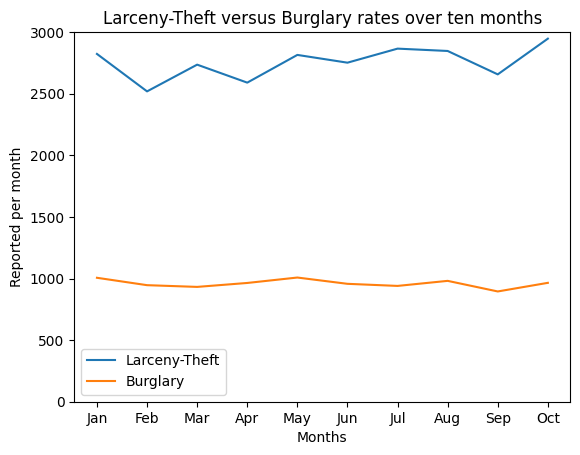

In [25]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
larceny_counts = {'Jan': jan.sum(), 'Feb': febu.sum(), 'Mar': mar.sum(), 'Apr': apr.sum(), 'May': may.sum(), 'Jun': jun.sum(), 'Jul': jul.sum(), 'Aug': aug.sum(), 'Sep': sep.sum(), 'Oct': octo.sum()}
burglary_count = {'Jan': janB.sum(), 'Feb': febuB.sum(), 'Mar': marB.sum(), 'Apr': aprB.sum(), 'May': mayB.sum(), 'Jun': junB.sum(), 'Jul': julB.sum(), 'Aug': augB.sum(), 'Sep': sepB.sum(), 'Oct': octoB.sum()}

larceny_values = [larceny_counts[month] for month in months]
burglary_values = [burglary_count[month] for month in months]
plt.plot(months, larceny_values, label='Larceny-Theft')
plt.plot(months, burglary_values, label='Burglary')

plt.xlabel('Months')
plt.ylim(0,3000)
plt.ylabel('Reported per month')
plt.title('Larceny-Theft versus Burglary rates over ten months')
plt.legend()
plt.show()

In [ ]:
###### Violent versus Non-violent ######


In [26]:
Category = crime.UCR_CRIME_CATEGORY
print(Category)

0         MOTOR VEHICLE THEFT
1                        RAPE
2               LARCENY-THEFT
3         MOTOR VEHICLE THEFT
4         MOTOR VEHICLE THEFT
                 ...         
131672          LARCENY-THEFT
131673    MOTOR VEHICLE THEFT
131674     AGGRAVATED ASSAULT
131675               BURGLARY
131676               BURGLARY
Name: UCR_CRIME_CATEGORY, Length: 131677, dtype: object


In [27]:
Category.unique()

array(['MOTOR VEHICLE THEFT', 'RAPE', 'LARCENY-THEFT', 'DRUG OFFENSE',
       'BURGLARY', 'AGGRAVATED ASSAULT',
       'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'ROBBERY', 'ARSON'],
      dtype=object)

In [28]:
Category.value_counts()

LARCENY-THEFT                            66216
BURGLARY                                 23648
MOTOR VEHICLE THEFT                      14391
DRUG OFFENSE                              9572
AGGRAVATED ASSAULT                        9306
ROBBERY                                   5640
RAPE                                      1981
ARSON                                      634
MURDER AND NON-NEGLIGENT MANSLAUGHTER      289
Name: UCR_CRIME_CATEGORY, dtype: int64

In [29]:
larc = crime[crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT']
burg = crime[crime.UCR_CRIME_CATEGORY == "BURGLARY"]
mvt = crime[crime.UCR_CRIME_CATEGORY == "MOTOR VEHICLE THEFT"]
drug = crime[crime.UCR_CRIME_CATEGORY == "DRUG OFFENSE"]

NonViolent = pd.concat([larc, burg, mvt, drug])

In [30]:
agg = crime[crime.UCR_CRIME_CATEGORY=='AGGRAVATED ASSAULT']
rob = crime[crime.UCR_CRIME_CATEGORY == "ROBBERY"]
r = crime[crime.UCR_CRIME_CATEGORY == "RAPE"]
ars = crime[crime.UCR_CRIME_CATEGORY == "ARSON"]
murd = crime[crime.UCR_CRIME_CATEGORY == "MURDER AND NON-NEGLIGENT MANSLAUGHTER"]

Violent = pd.concat([agg, rob, r, ars, murd])

In [31]:
df = pd.DataFrame(NonViolent)
df2 = pd.DataFrame(Violent)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'AGGRAVATED ASSAULT'),
  Text(1, 0, 'ROBBERY'),
  Text(2, 0, 'RAPE'),
  Text(3, 0, 'ARSON'),
  Text(4, 0, 'MURDER AND NON-NEGLIGENT MANSLAUGHTER'),
  Text(5, 0, 'LARCENY-THEFT'),
  Text(6, 0, 'BURGLARY'),
  Text(7, 0, 'MOTOR VEHICLE THEFT'),
  Text(8, 0, 'DRUG OFFENSE')])

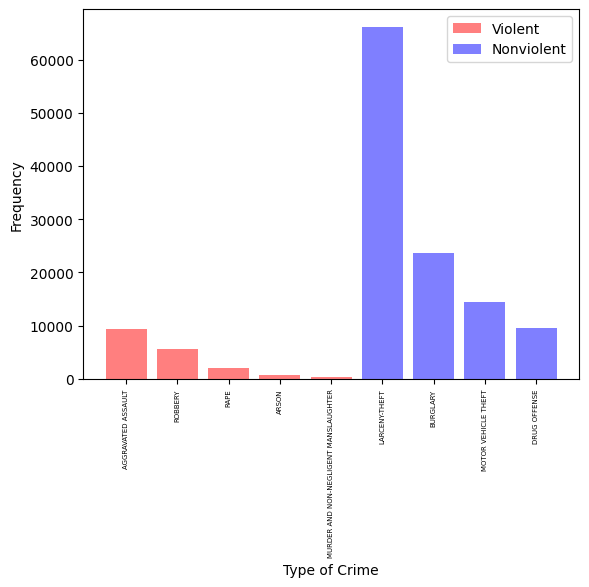

In [36]:
fig, ax = plt.subplots()
ax.bar(Violent.UCR_CRIME_CATEGORY.value_counts().index, 
       Violent.UCR_CRIME_CATEGORY.value_counts().values, 
       color='r', 
       alpha=0.5, 
       label='Violent')

ax.bar(NonViolent.UCR_CRIME_CATEGORY.value_counts().index, 
       NonViolent.UCR_CRIME_CATEGORY.value_counts().values, 
       color='b', 
       alpha=0.5, 
       label='Nonviolent')
plt.xlabel('Type of Crime')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(fontsize=5, rotation='vertical')

<Axes: ylabel='UCR_CRIME_CATEGORY'>

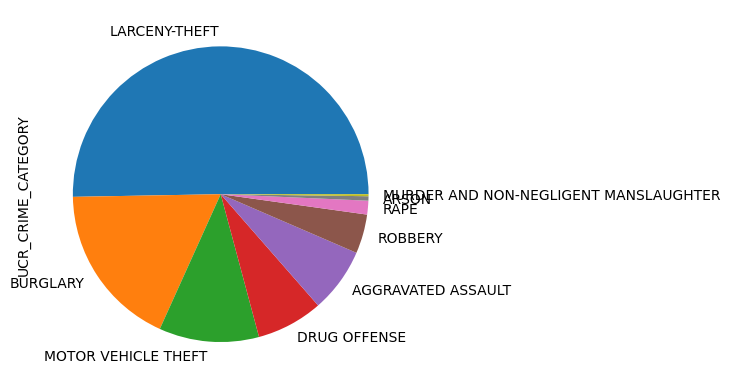

In [35]:
# Frequency 
crime.UCR_CRIME_CATEGORY.value_counts().plot.pie()

In [34]:
############ Data distinctions ############
crime.nunique()

INC_NUMBER               20
OCCURRED_ON           83138
OCCURRED_TO           66576
UCR_CRIME_CATEGORY        9
100_BLOCK_ADDR        29254
ZIP                      98
PREMISE_TYPE             94
dtype: int64